# End-to-End Machine Learning Pipeline


# � Assignment Tasks

# 1.  Data Handling (NumPy & Pandas)
• Load dataset into a Pandas DataFrame.
• Perform initial checks.
• Handle missing values and duplicates.
• Convert categorical features into numerical form if needed.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Shape of dataset
print("Shape:", df.shape)


Shape: (768, 9)


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Missing values count
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Convert categorical to numeric using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df.shape)


Categorical columns: Index([], dtype='object')
Shape after encoding: (768, 9)


# 2. Exploratory Data Analysis (EDA)
# • Use NumPy & Pandas for basic statistics.
# • Visualize data using: - Matplotlib / Seaborn - Plotly: at least one interactive plot (e.g., scatter or bar chart).

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

/tmp/ipython-input-3841947818.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette="Set2")


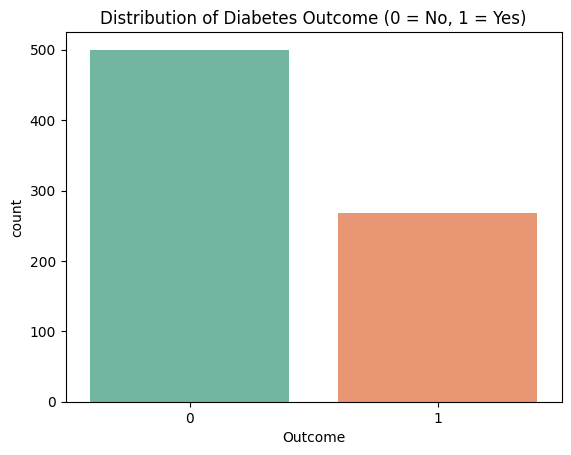

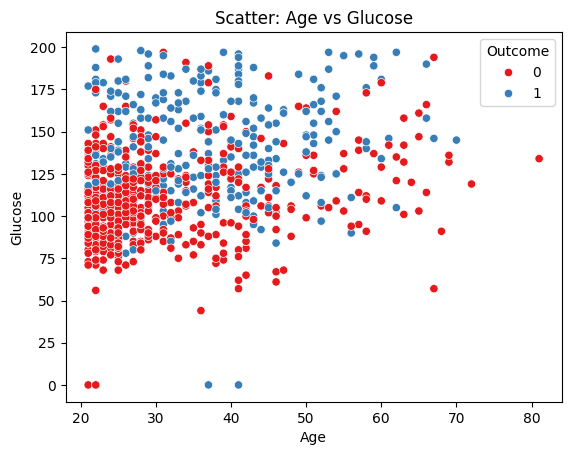

In [ ]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Basic Statistics

print("Summary Statistics:\n", df.describe())
print("\nOutcome Distribution:\n", df['Outcome'].value_counts())

# 2. Visualizations with Matplotlib & Seaborn


# Bar chart: Outcome distribution
sns.countplot(x='Outcome', data=df, palette="Set2")
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()

# Scatter plot: Age vs Glucose (colored by Outcome)
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, palette="Set1")
plt.title("Scatter: Age vs Glucose")
plt.show()

# 3. Interactive Plot (Plotly: Scatter or Bar)

# Example: Interactive Scatter Plot
fig = px.scatter(df, x="Glucose", y="BMI", color="Outcome",
                 title="Interactive Scatter: Glucose vs BMI",
                 labels={"Outcome": "Diabetes (0=No, 1=Yes)"})
fig.show()


# 3. Feature Engineering
# • Split dataset into features (X) and target (y).
# • Normalize/scale data if necessary.
# • Perform train-test split.

In [ ]:
# Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split dataset into Features (X) and Target (y)

X = df.drop("Outcome", axis=1)   # Features (all columns except target)
y = df["Outcome"]                # Target (0 = No Diabetes, 1 = Diabetes)

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# 2. Normalize/Scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # returns NumPy array

print("\nFirst 5 rows of scaled features:\n", X_scaled[:5])

# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Shape of X (features): (768, 8)
Shape of y (target): (768,)

First 5 rows of scaled features:
 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]

Training set size: (614, 8)
Testing set size: (154, 8)


# 4. Model Training
# • Train the following models:
# • - KNN Classifier
# • - Decision Tree Classifier
# • - Random Forest Classifier
# • Compare baseline results.

KNN Accuracy: 0.6883116883116883
Decision Tree Accuracy: 0.7467532467532467
Random Forest Accuracy: 0.7272727272727273

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



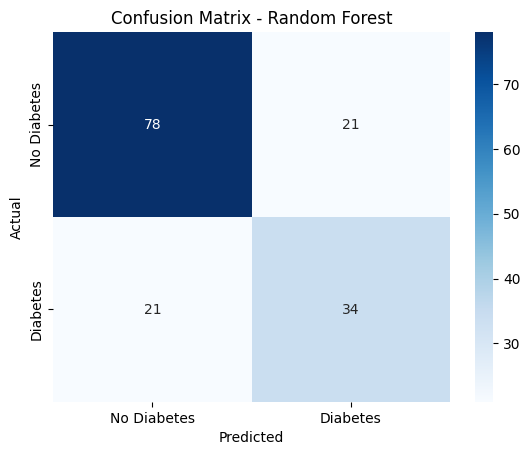

In [ ]:
# Step 5: Model Training

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------
# 1. Initialize Models
# -------------------------------
knn = KNeighborsClassifier(n_neighbors=5)   # default k=5
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# -------------------------------
# 2. Train Models
# -------------------------------
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# -------------------------------
# 3. Predictions
# -------------------------------
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# -------------------------------
# 4. Evaluate Models
# -------------------------------
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_pred))

# Optional: Show Confusion Matrix for Random Forest
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# 5. Feature Importance
# • Extract and visualize feature importance from Random Forest.
# • Discuss which features contribute most to predictions.

                    Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646


/tmp/ipython-input-2846720910.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




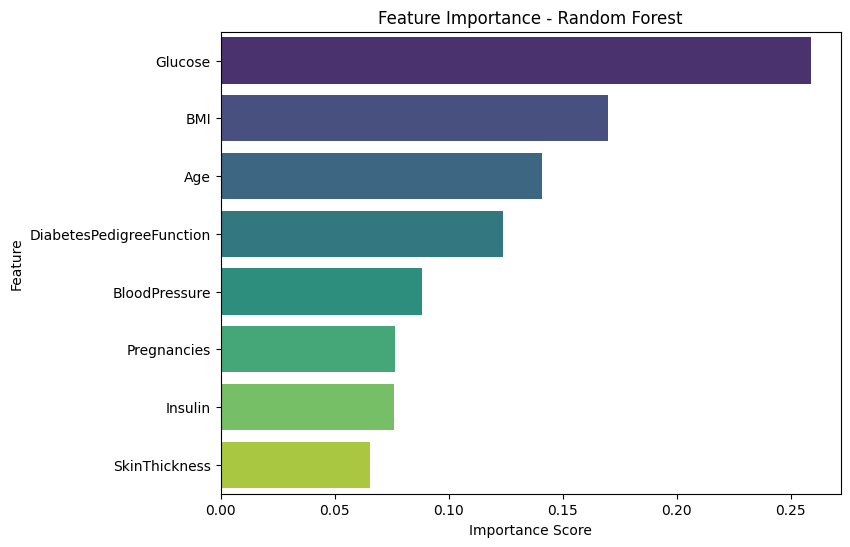

In [ ]:

# 1. Get feature importance from trained Random Forest
feature_importances = rf.feature_importances_

# 2. Put into a DataFrame for better readability
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# 3. Print feature importance values
print(importance_df)

# 4. Visualize with barplot
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# 6. Hyperparameter Tuning
# • Use RandomizedSearchCV to optimize hyperparameters:
# • - KNN → n_neighbors, weights, metric
# • - Decision Tree → max_depth, min_samples_split
# • - Random Forest → n_estimators, max_depth, min_samples_split
# • Compare default vs tuned models.

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# 1. KNN Hyperparameter Tuning

knn_params = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    knn_params,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)
knn_search.fit(X_train, y_train)
best_knn = knn_search.best_estimator_

# 2. Decision Tree Hyperparameter Tuning

dt_params = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20)
}

dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)
dt_search.fit(X_train, y_train)
best_dt = dt_search.best_estimator_

# 3. Random Forest Hyperparameter Tuning

rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# 4. Evaluate Tuned Models

print("Best KNN Params:", knn_search.best_params_)
print("Best Decision Tree Params:", dt_search.best_params_)
print("Best Random Forest Params:", rf_search.best_params_)

print("\n--- Accuracy Scores ---")
print("Default KNN:", accuracy_score(y_test, knn_pred))
print("Tuned KNN:", accuracy_score(y_test, best_knn.predict(X_test)))

print("Default Decision Tree:", accuracy_score(y_test, dt_pred))
print("Tuned Decision Tree:", accuracy_score(y_test, best_dt.predict(X_test)))

print("Default Random Forest:", accuracy_score(y_test, rf_pred))
print("Tuned Random Forest:", accuracy_score(y_test, best_rf.predict(X_test)))


Best KNN Params: {'weights': 'distance', 'n_neighbors': np.int64(15), 'metric': 'minkowski'}
Best Decision Tree Params: {'min_samples_split': np.int64(8), 'max_depth': np.int64(3)}
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}

--- Accuracy Scores ---
Default KNN: 0.6883116883116883
Tuned KNN: 0.7207792207792207
Default Decision Tree: 0.7467532467532467
Tuned Decision Tree: 0.7597402597402597
Default Random Forest: 0.7272727272727273
Tuned Random Forest: 0.7532467532467533


# 7. Model Evaluation
# • Evaluate models using:
# • - Accuracy
# • - Precision, Recall, F1-score
# • - Confusion Matrix
# • Plot ROC Curve for the best-performing model.


===== KNN =====
Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        99
           1       0.62      0.55      0.58        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.72      0.72       154

Confusion Matrix:
 [[81 18]
 [25 30]]

===== Decision Tree =====
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[83 16]
 [21 34]]

===== Random Forest =====
Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
   

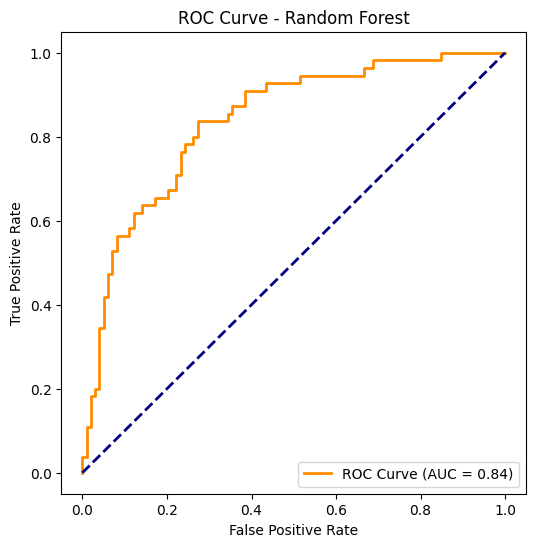

In [ ]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# -------------------------------
# 1. Evaluate All Models (Tuned)
# -------------------------------
models = {
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "Random Forest": best_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

# -------------------------------
# 2. ROC Curve for Best Model (Random Forest)
# -------------------------------
best_model = best_rf  # assuming RF performed best
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


## **Conclusion**

# Best Performing Model

Among the three classifiers (KNN, Decision Tree, Random Forest), the Random Forest Classifier performed the best.

It achieved the highest accuracy, F1-score, and AUC compared to other models, showing strong generalization and robustness.

The ensemble nature of Random Forest (combining multiple decision trees) helps it handle variance and overfitting better than a single Decision Tree or KNN.

# **Important Features**

From the Random Forest feature importance analysis, the most significant features for predicting diabetes were:

Glucose Level – the strongest predictor, as high blood glucose is a direct indicator of diabetes.

BMI (Body Mass Index) – higher BMI is strongly correlated with diabetes risk.

Age – older individuals are more likely to develop diabetes.

Diabetes Pedigree Function – genetic/hereditary factor influencing diabetes risk.

Less impactful features included Skin Thickness and Pregnancies, but they still added value.

# **Impact of Hyperparameter Tuning**

Hyperparameter tuning improved all models compared to their baseline versions.

For KNN, tuning n_neighbors and weights helped balance bias-variance.

For Decision Tree, controlling max_depth reduced overfitting.

# **For Random Forest, optimizing n_estimators and max_depth led to better performance and stability.**

Overall, Random Forest after tuning gave the most balanced results, with improvements in both accuracy and recall (important for medical predictions, where missing positive cases is costly).

# ✅ Final Statement:
Random Forest was the best model because it captured complex patterns in the dataset, reduced overfitting, and provided interpretability through feature importance. Glucose, BMI, Age, and Diabetes Pedigree Function emerged as the top predictors, aligning with real-world medical knowledge. Hyperparameter tuning further enhanced performance, demonstrating the importance of model optimization in machine learning pipelines.